# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction

< y >
* **Price** : The price of the used car in INR Lakhs.



< X >
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [5]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/week2/assignment2.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
data.shape

(6019, 14)

In [8]:
# 열 제거
data = data.drop(['Unnamed: 0'], axis=1)

In [12]:
print(data.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


In [13]:
# 결측치 처리
data = data.drop(columns=['New_Price'])
seats_mode = data['Seats'].mode()[0]
data['Seats'].fillna(seats_mode, inplace=True)
data['Mileage'] = data['Mileage'].str.extract('(\d+.\d+)').astype(float)
data['Engine'] = data['Engine'].str.extract('(\d+)').astype(float)
data['Power'] = data['Power'].str.extract('(\d+.\d+)').astype(float)
mileage_median = data['Mileage'].median()
engine_median = data['Engine'].median()
power_median = data['Power'].median()
data['Mileage'].fillna(mileage_median, inplace=True)
data['Engine'].fillna(engine_median, inplace=True)
data['Power'].fillna(power_median, inplace=True)

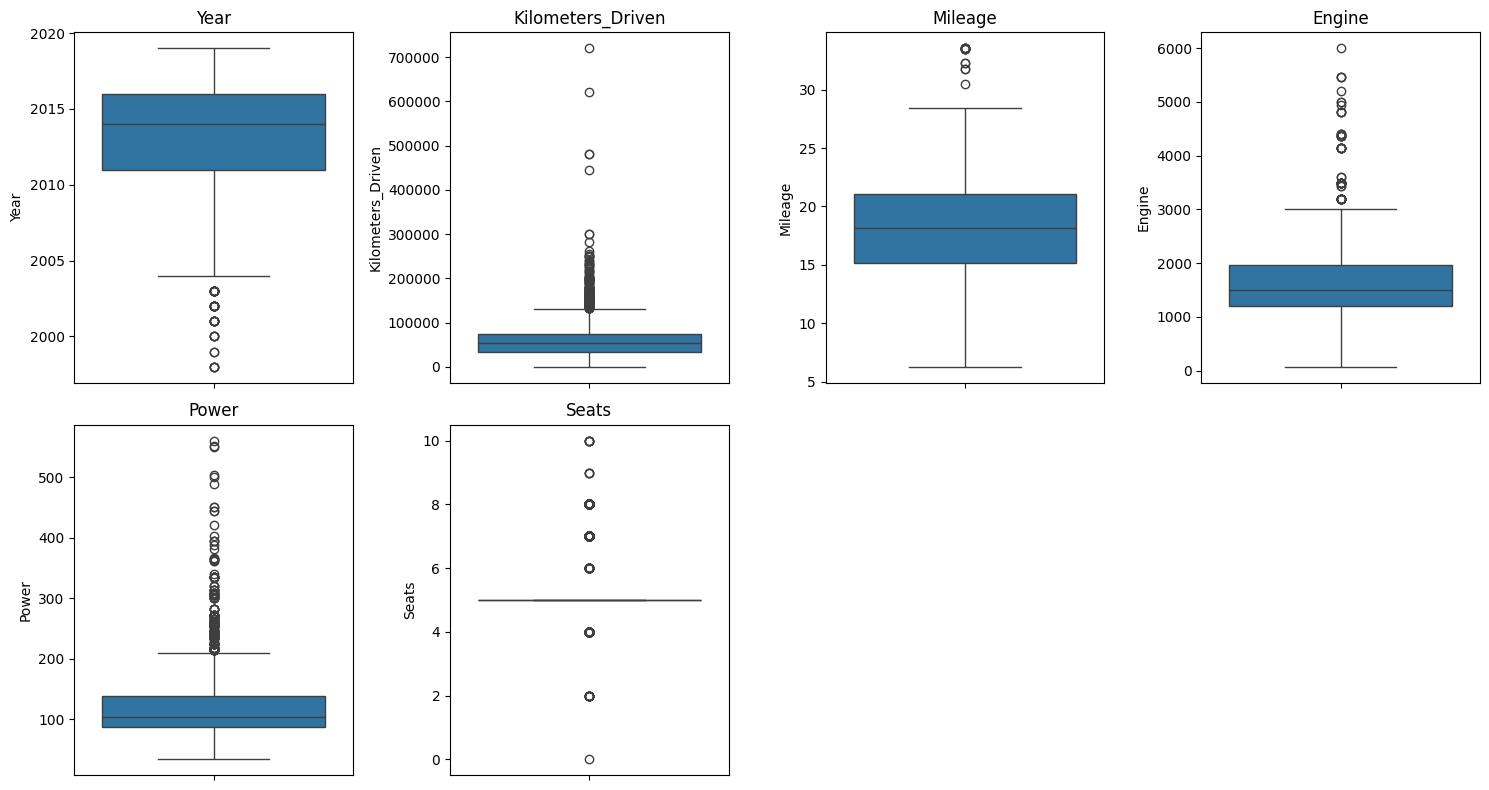

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 8))

numerical_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [32]:
data.isnull().sum(), data.head()

(Name                     0
 Location                 0
 Year                     0
 Kilometers_Driven        0
 Fuel_Type                0
 Transmission             0
 Owner_Type               0
 Mileage                  0
 Engine                   0
 Power                    0
 Seats                    0
 Price                    0
 Car_Age                  0
 Brand                    0
 Engine_to_Power_Ratio    0
 dtype: int64,
                                Name    Location  Year  Kilometers_Driven  \
 0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
 1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
 2                      Honda Jazz V     Chennai  2011              46000   
 3                 Maruti Ertiga VDI     Chennai  2012              87000   
 4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
 
   Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
 0       CNG       Man

In [16]:
# 이상치 처리
data = data[data.Kilometers_Driven != data.Kilometers_Driven.max()]
Q1_mileage = data['Mileage'].quantile(0.25)
Q3_mileage = data['Mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
data.loc[data['Mileage'] == 0, 'Mileage'] = lower_bound_mileage

In [17]:
# 변수 생성
current_year = 2020
data['Car_Age'] = current_year - data['Year']
data['Brand'] = data['Name'].apply(lambda x: x.split()[0])
mean_power = data[data['Power'] != 0]['Power'].mean()
data['Engine_to_Power_Ratio'] = data['Engine'] / data['Power'].replace(0, mean_power)

In [18]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Engine_to_Power_Ratio
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,10,Maruti,17.159560
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,5,Hyundai,12.535658
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,9,Honda,13.517475
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,8,Maruti,14.060388
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,7,Audi,13.977273


## 선형회귀

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [22]:
total_mse = []
total_r2 = []

X = data.drop(['Price', 'Name'], axis=1)
y = data['Price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

total_mse.append(mse)
total_r2.append(r2)

mse, r2

(33.10825897372394, 0.7480459984479172)

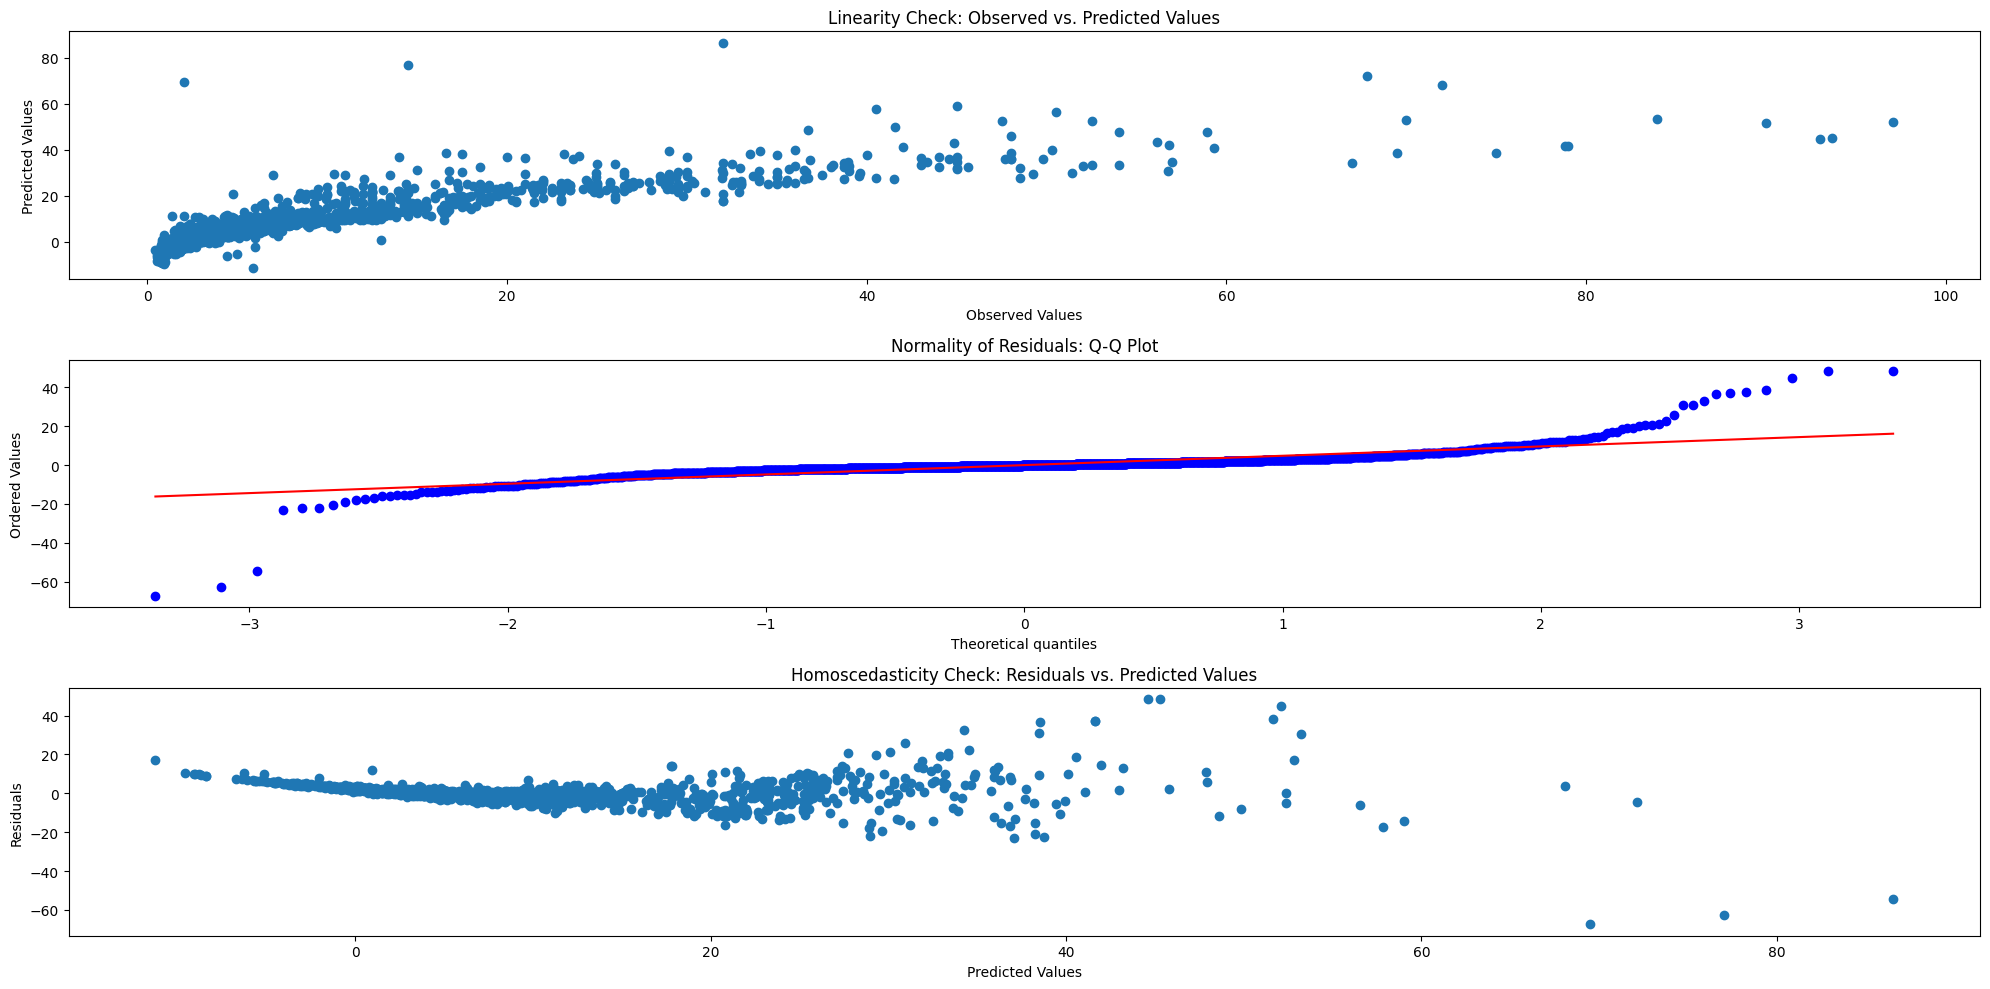

In [23]:
import scipy.stats as stats

residuals = y_test - y_pred

plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.scatter(y_test, y_pred)
plt.title('Linearity Check: Observed vs. Predicted Values')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')

plt.subplot(3, 1, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality of Residuals: Q-Q Plot')

plt.subplot(3, 1, 3)
plt.scatter(y_pred, residuals)
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [24]:
# y값에 log 변환
X = data.drop(['Price', 'Name'], axis=1)
y = np.log(data['Price'])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

total_mse.append(mse)
total_r2.append(r2)

mse, r2

(0.07479624972430743, 0.9063585551968921)

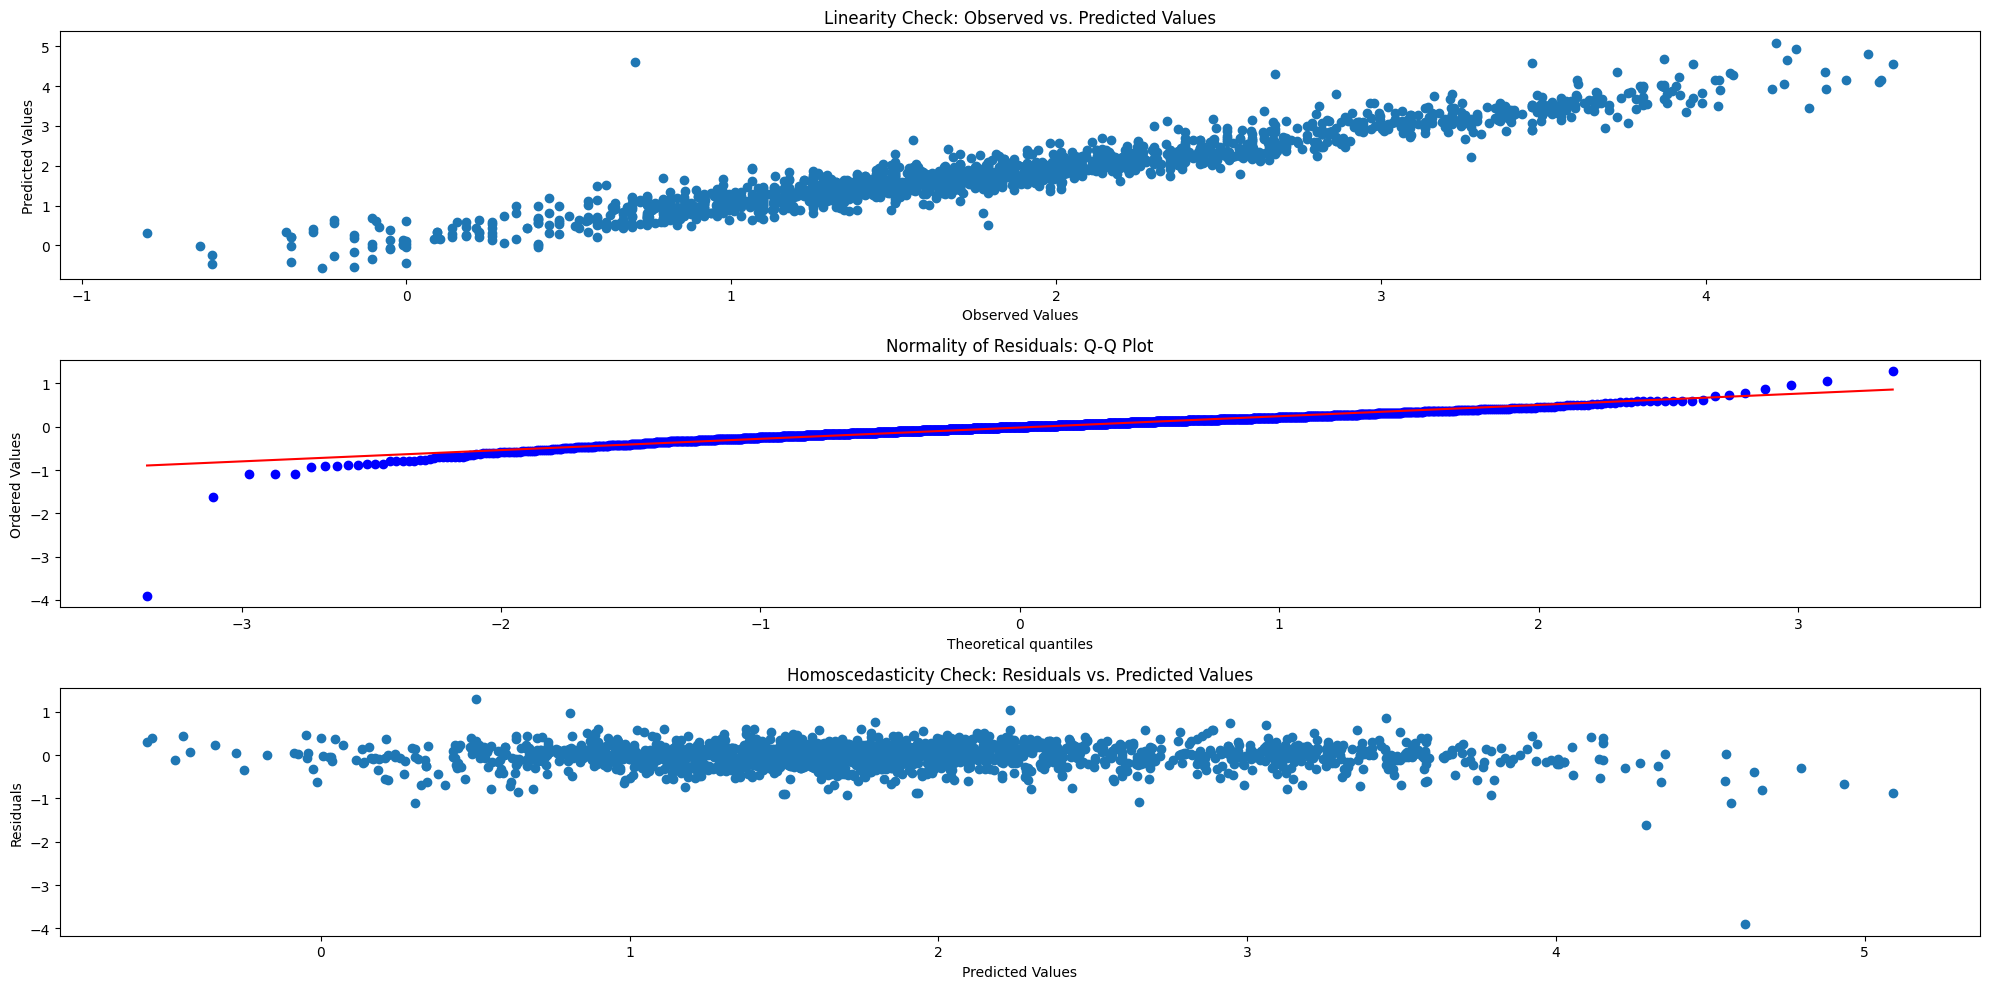

In [25]:
import scipy.stats as stats

residuals = y_test - y_pred

plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.scatter(y_test, y_pred)
plt.title('Linearity Check: Observed vs. Predicted Values')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')

plt.subplot(3, 1, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality of Residuals: Q-Q Plot')

plt.subplot(3, 1, 3)
plt.scatter(y_pred, residuals)
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [26]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_numeric = X.select_dtypes(include=[np.number])
VIF_data = pd.DataFrame()
VIF_data["Feature"] = X_numeric.columns
VIF_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]

VIF_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
0,Year,7344.042652
43,Brand_Maruti,1037.131358
35,Brand_Hyundai,968.805264
34,Brand_Honda,587.463759
53,Brand_Toyota,410.802253
44,Brand_Mercedes-Benz,322.376012
54,Brand_Volkswagen,319.986259
33,Brand_Ford,305.825750
42,Brand_Mahindra,278.636950
27,Brand_BMW,271.814620


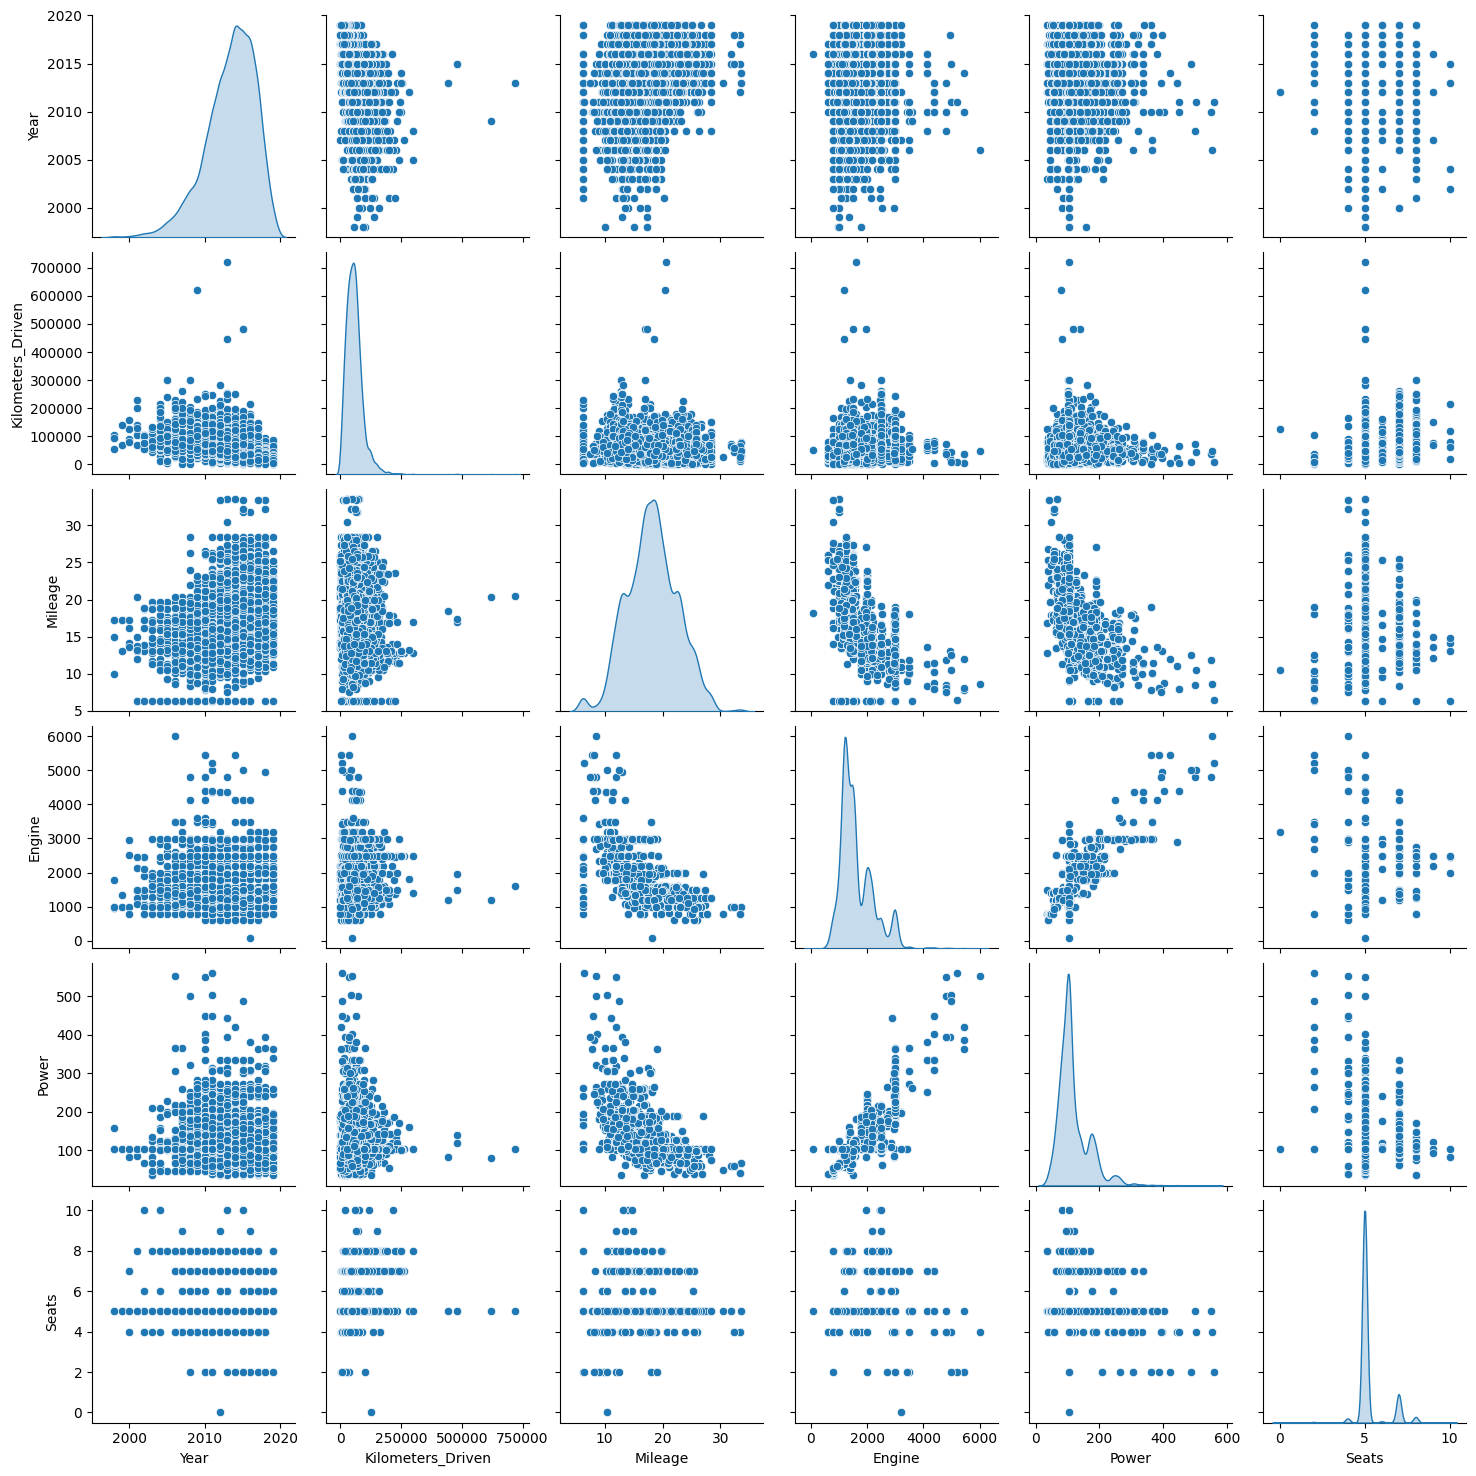

In [33]:
sns.pairplot(data[numerical_columns], diag_kind='kde')
plt.show()

In [34]:
# 다중공선성이 나타나는 열 제거 후 다시 학습
X = data.drop(['Price', 'Name', 'Year', 'Power'], axis=1)
y = np.log(data['Price'])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

total_mse.append(mse)
total_r2.append(r2)

mse, r2

(0.07447673317048414, 0.9067585751423948)

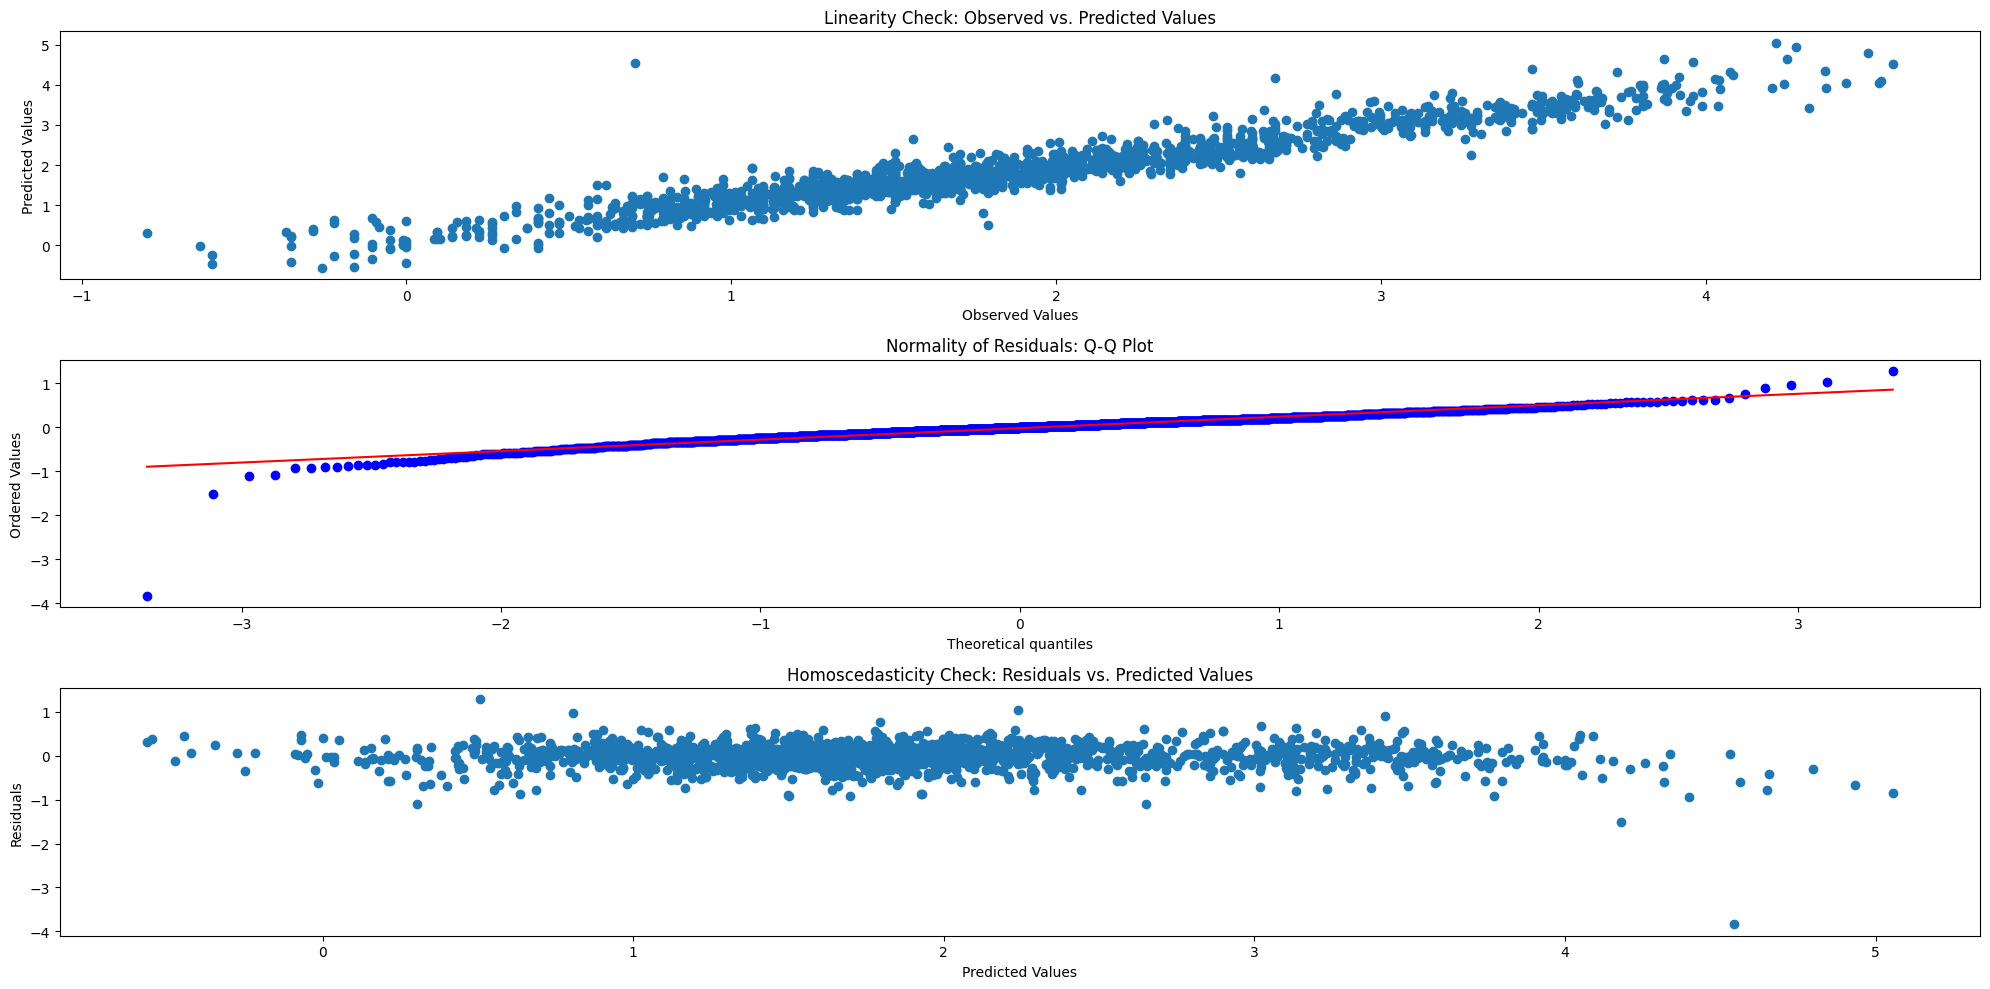

In [35]:
import scipy.stats as stats

residuals = y_test - y_pred

plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1)
plt.scatter(y_test, y_pred)
plt.title('Linearity Check: Observed vs. Predicted Values')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')

plt.subplot(3, 1, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality of Residuals: Q-Q Plot')

plt.subplot(3, 1, 3)
plt.scatter(y_pred, residuals)
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()